# Minimizing Churn of Subscription Product Through Financial Habit Analysis

Market: The target audience is the entirety of a company's subscription base - who we want to keep
Product: The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten. 
Goal: The objective of this model is to predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. 
- These efforts can be email reminders about the benefits of the product, especially focusing on features that are new tor that the user has shown to value. 

In this Case Study we're working for a fintech company that provides a subscription product to its users, which allows them to manage their bank accounts, provides them with personalized coupons, informs them of the latest low-APR loans, and educates them on best methods to save money. We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they may be interested in. 

Data
- Finance Data
- Product Finance Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [4]:
churn_data = pd.read_csv('./data/churn_data.csv')
churn_data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
churn_data.info

<bound method DataFrame.info of         user  churn   age housing  credit_score  deposits  withdrawal  \
0      55409      0  37.0      na           NaN         0           0   
1      23547      0  28.0       R         486.0         0           0   
2      58313      0  35.0       R         561.0        47           2   
3       8095      0  26.0       R         567.0        26           3   
4      61353      1  27.0      na           NaN         0           0   
...      ...    ...   ...     ...           ...       ...         ...   
26995  24291      1  24.0       R         580.0         0           0   
26996   4116      1  26.0      na           NaN         0           0   
26997  23740      0  22.0      na           NaN         0           0   
26998  47663      1  46.0      na         529.0         2           0   
26999  52752      1  34.0      na         525.0         0           0   

       purchases_partners  purchases  cc_taken  ...  waiting_4_loan  \
0                   

In [6]:
churn_data.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
churn_data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Removing Nulls

In [10]:
churn_data.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [11]:
churn_data.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [12]:
churn_data = churn_data[pd.notnull(churn_data['age'])]

In [14]:
churn_data = churn_data.drop(columns = ['credit_score', 'rewards_earned'])

### Histograms

In [17]:
x = churn_data.drop(columns = ['user', 'churn'])

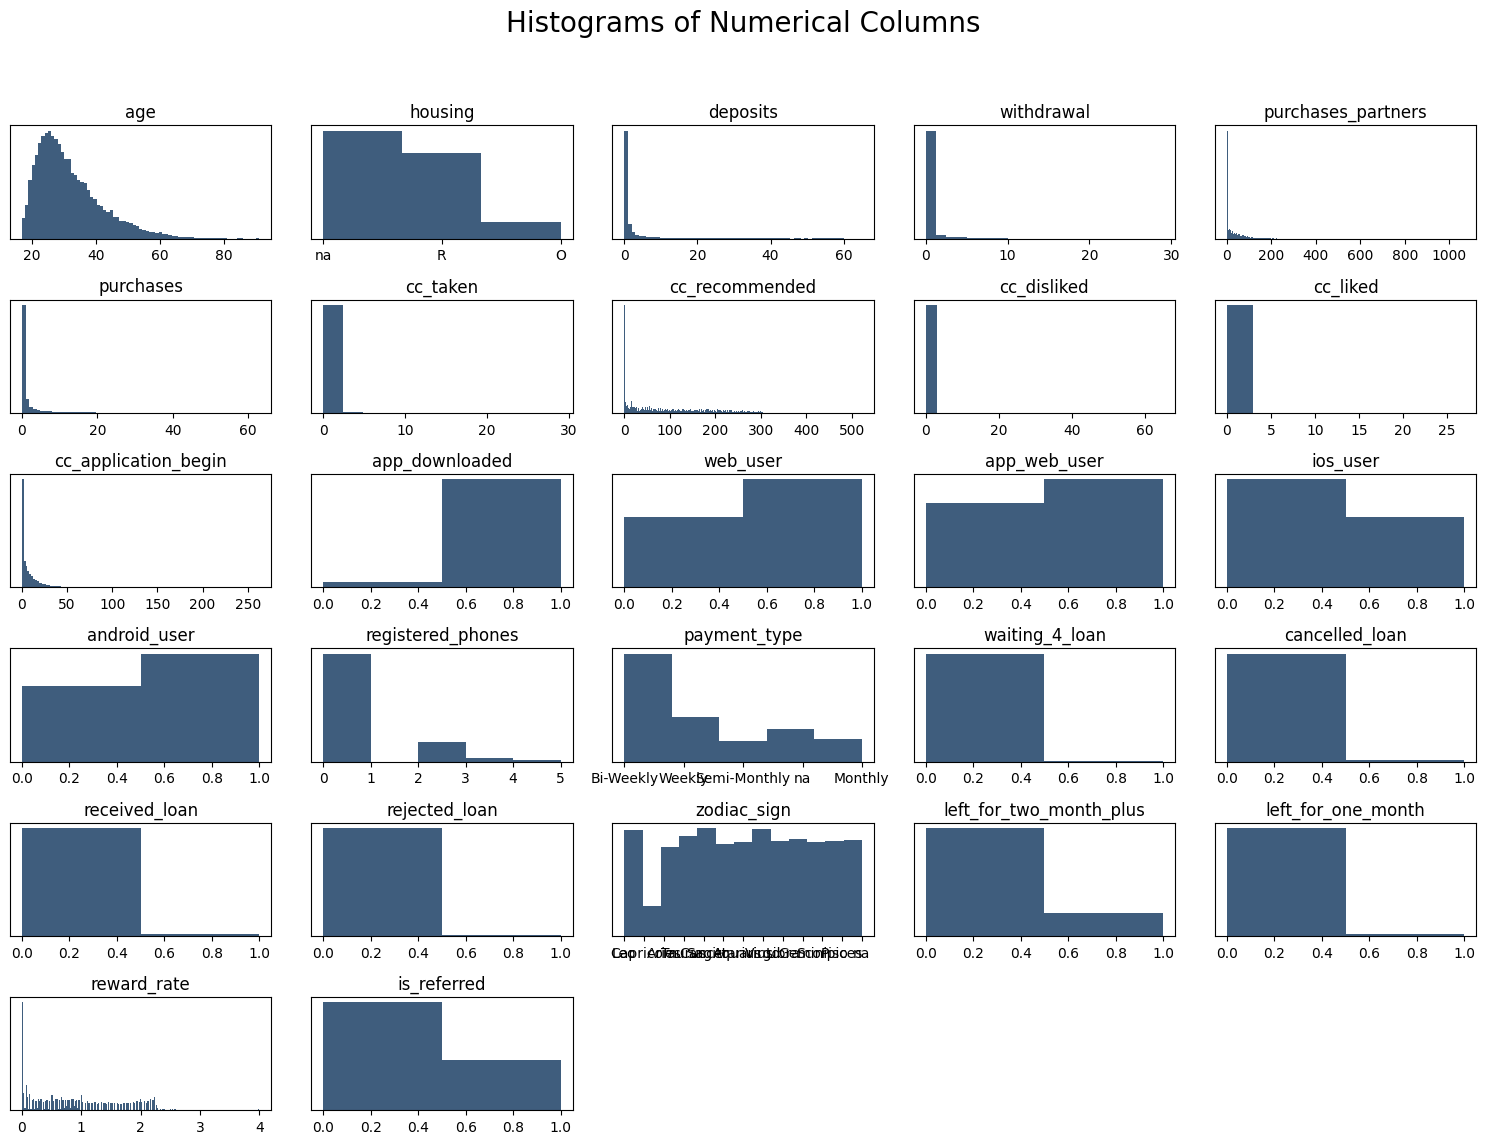

In [20]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, x.shape[1] + 1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(x.columns.values[i-1])
    
    vals = np.size(x.iloc[:, i - 1].unique())
    
    plt.hist(x.iloc[:,i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])